<a href="https://www.kaggle.com/code/vanpatangan/supply-chain-in-healthcare?scriptVersionId=201019330" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load datasets
inventory_df = pd.read_csv('/kaggle/input/hospital-supply-chain/inventory_data.csv')
patient_df = pd.read_csv('/kaggle/input/hospital-supply-chain/patient_data.csv')
staff_df = pd.read_csv('/kaggle/input/hospital-supply-chain/staff_data.csv')
financial_df = pd.read_csv('/kaggle/input/hospital-supply-chain/financial_data.csv')

sns.set_theme(style="whitegrid", palette="pastel")

# Data Summary

In [2]:
def check(df):
    """
    Generates a concise summary of DataFrame columns.
    """
    # Use list comprehension to iterate over each column
    summary = [
        [col, df[col].dtype, df[col].count(), df[col].nunique(), df[col].isnull().sum(), df.duplicated().sum()]
        for col in df.columns
    ]

    # Create a DataFrame from the list of lists
    df_check = pd.DataFrame(summary, columns=["column", "dtype", "instances", "unique", "sum_null", "duplicates"])

    return df_check

In [3]:
print("Inventory Data Summary")
display(check(inventory_df))
display(inventory_df.head())
print("Patient Data Summary")
display(check(patient_df))
display(patient_df.head())
print("Staff Data Summary")
display(check(staff_df))
display(staff_df.head())
print("Financial Data Summary")
display(check(financial_df))
display(financial_df.head())

Inventory Data Summary


,column,dtype,instances,unique,sum_null,duplicates
0,Date,object,30,30,0,0
1,Item_ID,int64,30,10,0,0
2,Item_Type,object,30,2,0,0
3,Item_Name,object,30,5,0,0
4,Current_Stock,int64,30,30,0,0
5,Min_Required,int64,30,30,0,0
6,Max_Capacity,int64,30,30,0,0
7,Unit_Cost,float64,30,30,0,0
8,Avg_Usage_Per_Day,int64,30,30,0,0
9,Restock_Lead_Time,int64,30,18,0,0


,Date,Item_ID,Item_Type,Item_Name,Current_Stock,Min_Required,Max_Capacity,Unit_Cost,Avg_Usage_Per_Day,Restock_Lead_Time,Vendor_ID
0,2024-10-01,105,Consumable,Surgical Mask,3968,158,5900,14505.22,126,11,V001
1,2024-10-02,100,Equipment,X-ray Machine,1217,219,1137,10026.74,157,28,V001
2,2024-10-03,103,Consumable,Ventilator,1734,572,1270,19121.69,112,14,V002
3,2024-10-04,103,Equipment,X-ray Machine,3349,421,594,12879.98,489,8,V001
4,2024-10-05,107,Equipment,Ventilator,2817,792,3798,8477.39,259,8,V003


Patient Data Summary


,column,dtype,instances,unique,sum_null,duplicates
0,Patient_ID,object,50,50,0,0
1,Admission_Date,object,50,50,0,0
2,Discharge_Date,object,50,50,0,0
3,Primary_Diagnosis,object,50,4,0,0
4,Procedure_Performed,object,50,4,0,0
5,Room_Type,object,50,2,0,0
6,Bed_Days,int64,50,14,0,0
7,Supplies_Used,object,50,3,0,0
8,Equipment_Used,object,50,3,0,0
9,Staff_Needed,object,50,3,0,0


,Patient_ID,Admission_Date,Discharge_Date,Primary_Diagnosis,Procedure_Performed,Room_Type,Bed_Days,Supplies_Used,Equipment_Used,Staff_Needed
0,P001,2024-10-26 04:23:05,2024-10-10 04:17:50,Diabetes,Chest X-ray,ICU,10,"Gown, IV",MRI Machine,2 Surgeons
1,P002,2024-10-14 03:45:33,2024-10-08 02:55:45,Pneumonia,MRI,General Ward,11,"Mask, Gown",X-ray Machine,1 Nurse
2,P003,2024-10-07 00:49:50,2024-10-23 12:38:51,Pneumonia,Appendectomy,General Ward,8,"Gloves, IV",MRI Machine,1 Nurse
3,P004,2024-10-05 00:16:50,2024-10-17 21:40:51,Appendicitis,Blood Test,General Ward,11,"Gown, IV",MRI Machine,"1 Nurse, 1 Doctor"
4,P005,2024-10-29 10:13:52,2024-10-20 17:36:51,Pneumonia,MRI,ICU,7,"Mask, Gown",MRI Machine,2 Surgeons


Staff Data Summary


,column,dtype,instances,unique,sum_null,duplicates
0,Staff_ID,object,50,50,0,0
1,Staff_Type,object,50,3,0,0
2,Shift_Date,object,50,50,0,0
3,Shift_Start_Time,object,50,3,0,0
4,Shift_End_Time,object,50,3,0,0
5,Current_Assignment,object,50,3,0,0
6,Hours_Worked,int64,50,4,0,0
7,Patients_Assigned,int64,50,9,0,0
8,Overtime_Hours,int64,50,5,0,0


,Staff_ID,Staff_Type,Shift_Date,Shift_Start_Time,Shift_End_Time,Current_Assignment,Hours_Worked,Patients_Assigned,Overtime_Hours
0,S001,Surgeon,2024-10-24 12:24:42,07:00 AM,06:00 PM,ER,9,8,0
1,S002,Technician,2024-10-15 11:22:46,07:00 AM,06:00 PM,ICU Surgery,9,2,3
2,S003,Nurse,2024-10-19 16:27:18,08:00 AM,06:00 PM,ER,8,4,3
3,S004,Nurse,2024-10-04 13:25:31,07:00 AM,06:00 PM,ER,9,8,1
4,S005,Surgeon,2024-10-13 20:43:30,07:00 AM,07:00 PM,ICU Surgery,11,9,4


Financial Data Summary


,column,dtype,instances,unique,sum_null,duplicates
0,Date,object,30,30,0,0
1,Expense_Category,object,30,3,0,0
2,Amount,float64,30,30,0,0
3,Description,object,30,3,0,0


,Date,Expense_Category,Amount,Description
0,2024-10-01,Staffing,1365.95,Ventilators
1,2024-10-02,Staffing,46442.73,Surgical masks
2,2024-10-03,Staffing,34964.49,Surgical masks
3,2024-10-04,Supplies,35552.23,Surgical masks
4,2024-10-05,Staffing,30207.18,Ventilators


# EDA

## Stock Level Trends Over Time
**Plot the trends in stock levels for selected supplies over time.**

In [4]:
print(inventory_df['Item_Name'].value_counts())

Item_Name
X-ray Machine    10
Ventilator        7
IV Drip           6
Gloves            4
Surgical Mask     3
Name: count, dtype: int64


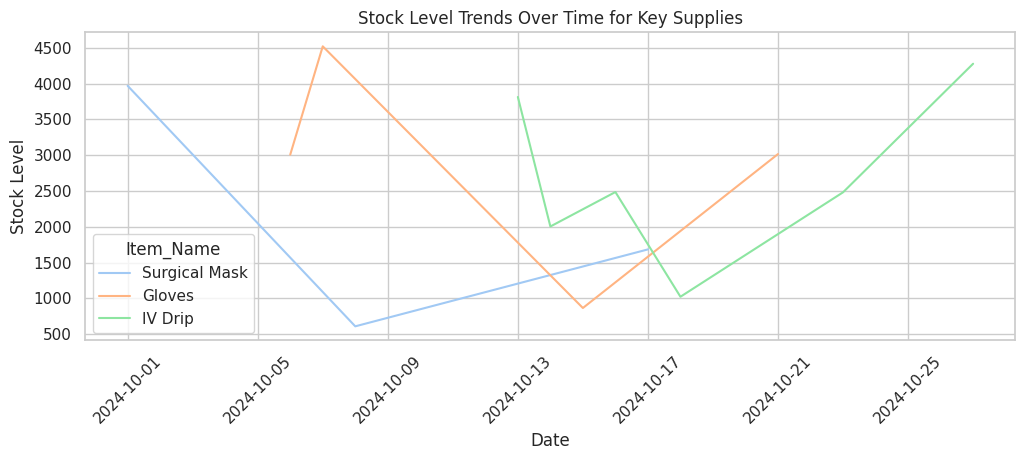

In [5]:
# Convert Date column is in datetime format
inventory_df['Date'] = pd.to_datetime(inventory_df['Date'])

# Select a few key supplies for visualization
key_supplies = inventory_df[inventory_df['Item_Name'].isin(['Surgical Mask', 'Gloves', 'IV Drip'])]

plt.figure(figsize=(12, 4))
sns.lineplot(x='Date', y='Current_Stock', hue='Item_Name', data=key_supplies)
plt.title('Stock Level Trends Over Time for Key Supplies')
plt.xlabel('Date')
plt.ylabel('Stock Level')
plt.xticks(rotation=45)
plt.show()

## Analyze Stock Levels vs. Demand
**Visualize how long the hospital's current stock of supplies will last based on average daily usage.**

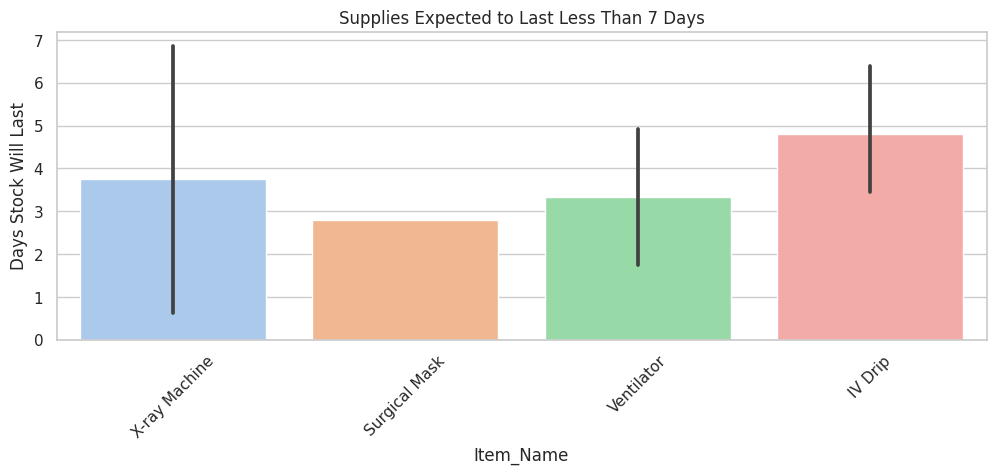

In [6]:
inventory_df['Days_Stock_Last'] = inventory_df['Current_Stock'] / inventory_df['Avg_Usage_Per_Day']

# Visualize supplies that are expected to last less than 7 days
low_stock_items = inventory_df[inventory_df['Days_Stock_Last'] < 7]

plt.figure(figsize=(12, 4))
sns.barplot(x='Item_Name', y='Days_Stock_Last', data=low_stock_items)
plt.title('Supplies Expected to Last Less Than 7 Days')
plt.xticks(rotation=45)
plt.ylabel('Days Stock Will Last')
plt.show()

💡Surgical Masks have the shortest expected duration

## Equipment Utilization by Patients
**Which equipment is used most frequently by patients.**

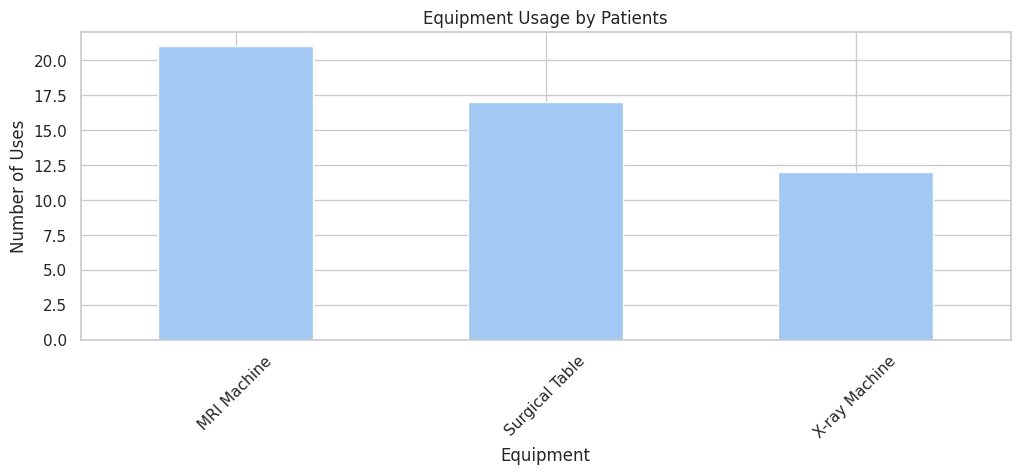

In [7]:
equipment_usage = patient_df['Equipment_Used'].value_counts()

plt.figure(figsize=(12, 4))
equipment_usage.plot(kind='bar')
plt.title('Equipment Usage by Patients')
plt.xlabel('Equipment')
plt.ylabel('Number of Uses')
plt.xticks(rotation=45)
plt.show()

## Workload Distribution by Staff Assignment
**Show the average number of patients assigned to staff in different hospital areas.**

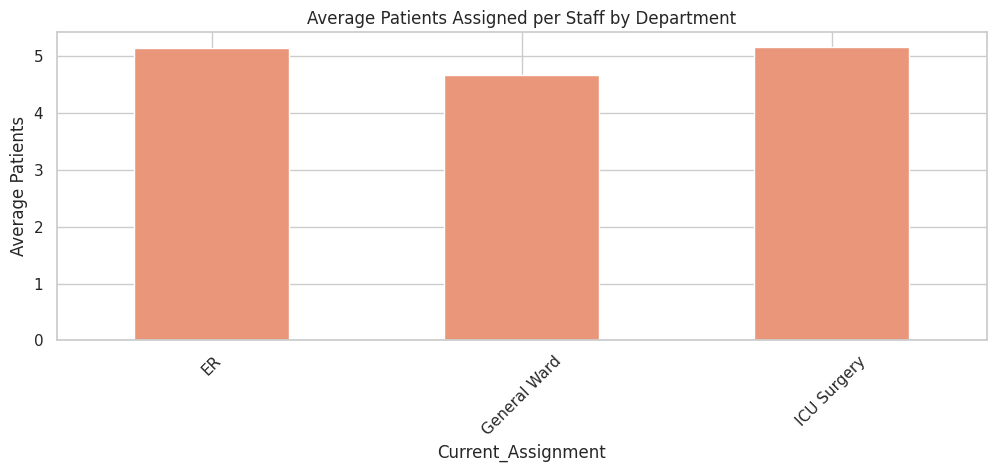

In [8]:
plt.figure(figsize=(12, 4))
staff_df.groupby('Current_Assignment')['Patients_Assigned'].mean().plot(kind='bar', color='darksalmon')
plt.title('Average Patients Assigned per Staff by Department')
plt.ylabel('Average Patients')
plt.xticks(rotation=45)
plt.show()

## Overtime Hours by Staff Type
**Visualize average overtime hours worked by different types of staff.**

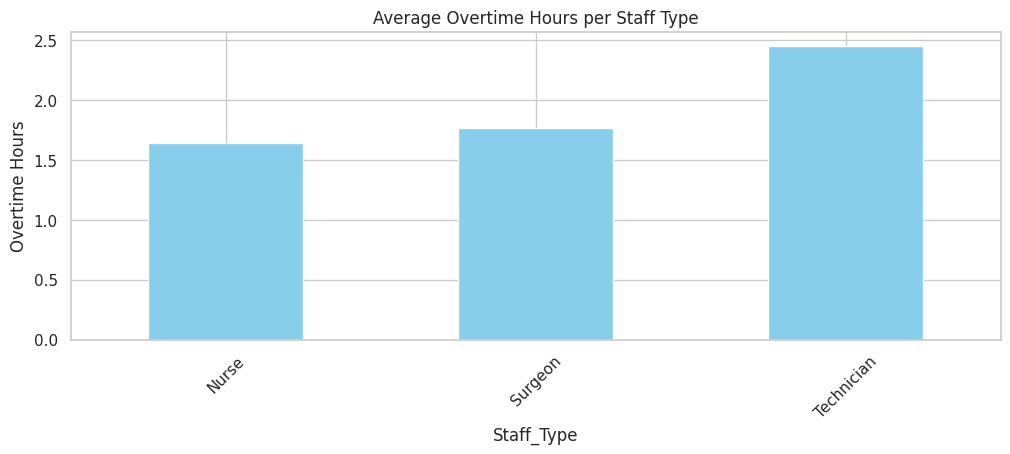

In [9]:
overtime_by_staff = staff_df.groupby('Staff_Type')['Overtime_Hours'].mean()

plt.figure(figsize=(12, 4))
overtime_by_staff.plot(kind='bar', color='skyblue')
plt.title('Average Overtime Hours per Staff Type')
plt.ylabel('Overtime Hours')
plt.xticks(rotation=45)
plt.show()

## Expense Breakdown (Supplies, Equipment, Staffing)
**How financial resources are distributed among different expense categories.**

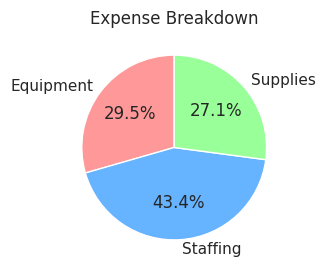

In [10]:
plt.figure(figsize=(3, 3))
financial_df.groupby('Expense_Category')['Amount'].sum().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Expense Breakdown')
plt.ylabel('')
plt.show()

## Feature Engineering

In [11]:
# Extract features for patient supply usage
patient_df['Supplies_Used_List'] = patient_df['Supplies_Used'].apply(lambda x: x.split(','))

# Create a count of supplies used
supply_usage = patient_df.explode('Supplies_Used_List')['Supplies_Used_List'].value_counts().reset_index()
supply_usage.columns = ['Supply', 'Total_Demand']

# Merge with inventory data
inventory_df['Date'] = pd.to_datetime(inventory_df['Date'])  # Ensure Date is in datetime format
supply_stock = inventory_df[['Item_Name', 'Current_Stock', 'Avg_Usage_Per_Day', 'Restock_Lead_Time', 'Unit_Cost']]
supply_stock = supply_stock.rename(columns={'Item_Name': 'Supply'})

# Merge supply usage with stock
supply_comparison = pd.merge(supply_usage, supply_stock, how='left', on='Supply')

# Fill NaN values in case some supplies are missing from the inventory_df
supply_comparison.fillna(0, inplace=True)


In [12]:
supply_comparison.head()

,Supply,Total_Demand,Current_Stock,Avg_Usage_Per_Day,Restock_Lead_Time,Unit_Cost
0,IV,35,0.0,0.0,0.0,0.00
1,Gloves,20,3007.0,28.0,22.0,12128.06
2,Gloves,20,4519.0,468.0,2.0,384.35
3,Gloves,20,866.0,30.0,5.0,11399.51
4,Gloves,20,3015.0,298.0,17.0,17930.98


# Modeling

Mean Absolute Error: 3.333333333333334


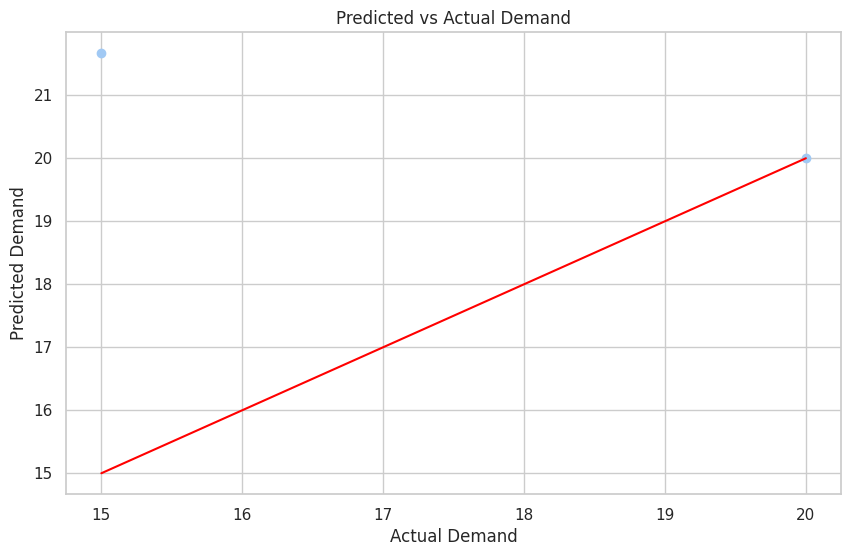

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

# Features for demand prediction: here we're only using past usage and current stock
X = supply_comparison[['Current_Stock', 'Avg_Usage_Per_Day', 'Restock_Lead_Time']]
y = supply_comparison['Total_Demand']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Gradient Boosting Regressor
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Visualize predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Perfect prediction line
plt.xlabel('Actual Demand')
plt.ylabel('Predicted Demand')
plt.title('Predicted vs Actual Demand')
plt.show()


*Model is off by 3units per supply prediction. Perhaps, will need to include more features to improve MAE. wip...*